## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз"яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [136]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
sns.set_context("talk")

%matplotlib inline

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [137]:
dataset = pd.read_csv("../titanic.csv", sep=",", encoding="utf-8", index_col=0)

In [138]:
dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [139]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [140]:
dataset.shape

(891, 11)

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [142]:
dataset.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

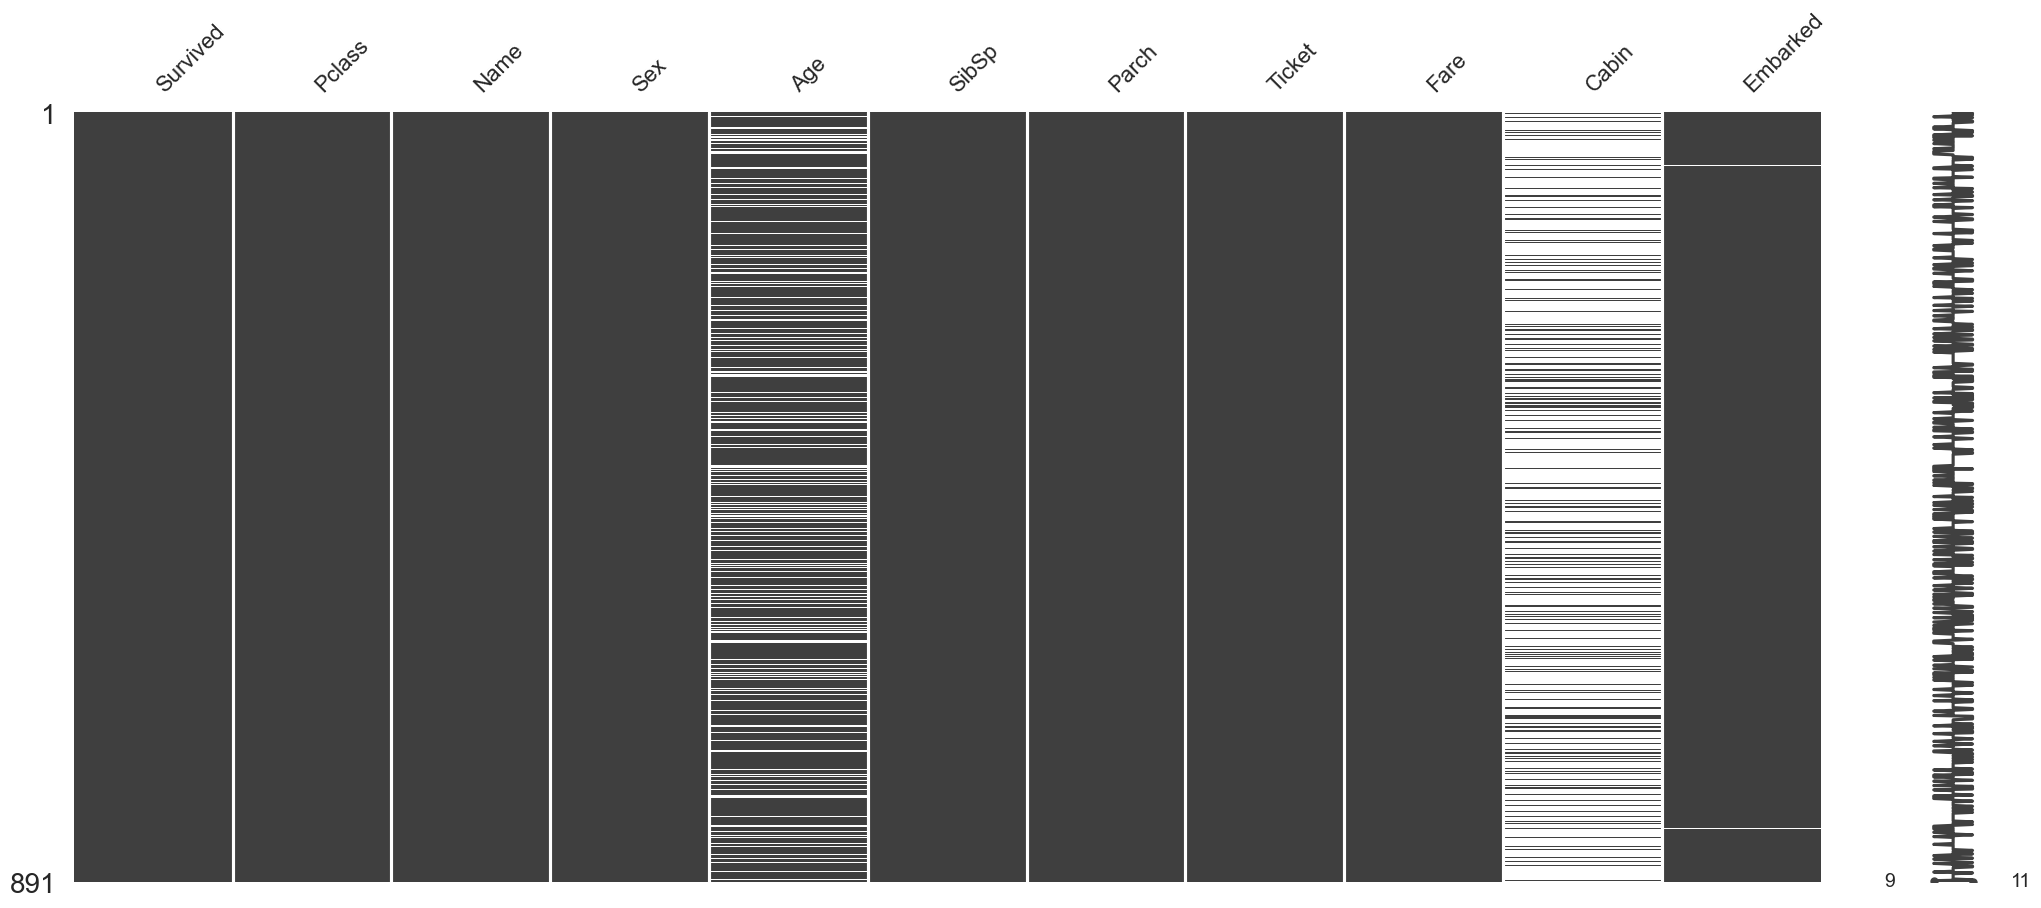

In [143]:
msno.matrix(dataset)

Ваші висновки: \
Згідно цієї матриці ми можемо сказати що в колонці __age__, __cabin__ та __embarked__ є пропущені значення. \
Серед яких 177 пропущених у __age__, 687 у __cabin__ та 2 пропущених у  __embarked__

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



In [144]:
pearson_corr = dataset.corr("pearson", numeric_only=True)

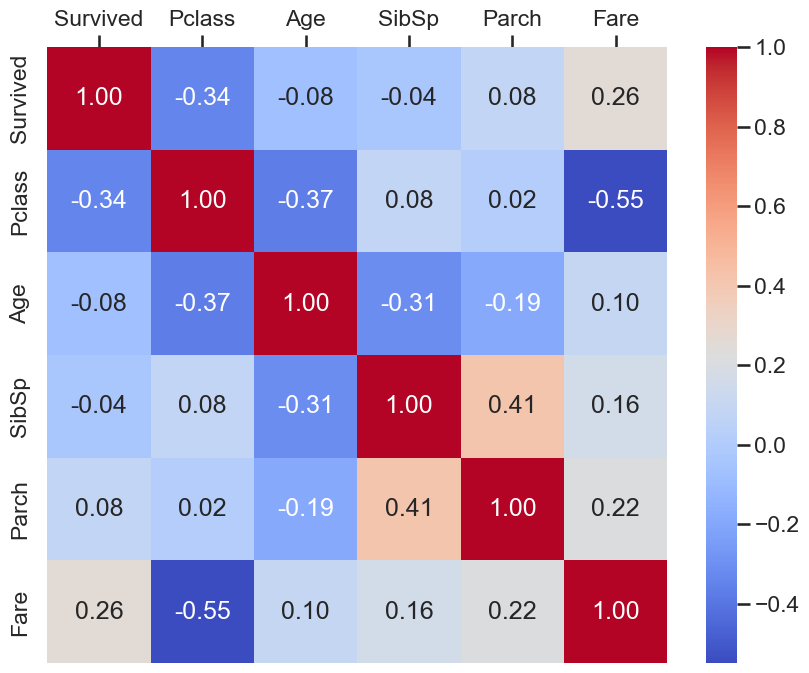

In [145]:
fig, ax = plt.subplots(figsize=(10,8))
corr = sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
corr.xaxis.tick_top()

Ваші висновки:

Згідно цієї матриці кореляції можна зробити висновки: 
- ```Parch``` та ```SibSp``` мають позитивний звязок (0.41) це означає що були сімейні подорожі
- ```Age``` та ```SibSp``` мають негативний звязок (-0.31) це означає що чим старше пасажир тим менше він має братів, сестер або подружжя на борту
- ```Fare``` та ```Pclass``` мають доволі великий негативний звязок (-0.55) тому що чим дорожча вартість квитка тим менеше число класу (тобто клас вище)
- ```Pclass``` та ```Survived``` мають негативний звязок (-0.34) це означає що пасажири з класом кращим класом квитка мали більше шансів на виживання
- ```Survived``` та ```Fare``` мають позитивний звязок (0.26) це означає що пасажири з дорожчими квитками мали більші шанси вижити


**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [146]:

def fill_missed(df: DataFrame, column: str, group_by: list | None = None) -> DataFrame:
    df = df.copy()

    if group_by is None:
        df[column] = df[column].transform(lambda x: x.fillna(x.median()))
    else:
        df[column] = df.groupby(group_by)[column].transform(lambda x: x.fillna(x.median()))
        
    return df

dataset = fill_missed(dataset, "Age", ["Sex", "Pclass"])
dataset.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Ваші висновки:

За допомогою функції ```fill_missed``` ми можемо заповнити пусті значення в обраній колонці медіаною груп які ми обрали для того щоб далі ми змогли норально працювати з колонкою ```Age```.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





<Axes: xlabel='Age_Category', ylabel='count'>

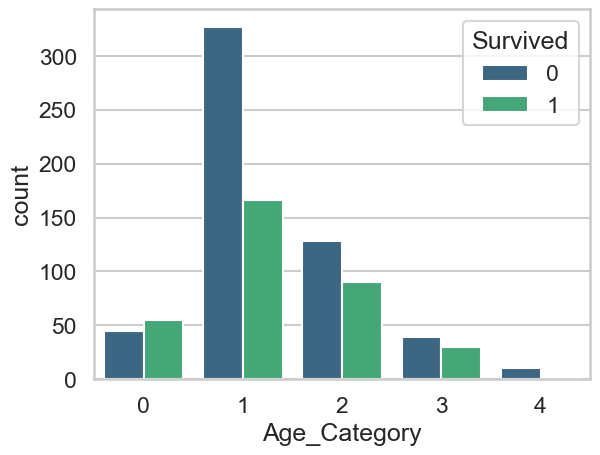

In [147]:
bins = [i * 16 for i in range(6)]
labels = [i for i in range(5)]

dataset["Age_Category"] = pd.cut(dataset["Age"], bins=bins, labels=labels, include_lowest=True)

sns.countplot(
    dataset,
    x="Age_Category", 
    hue="Survived", 
    palette="viridis"
)

Ваші висновки:

Згідно цієї діаграми можна сказати що вік пасажира має безпосереднє відношення до його шансів на виживання тому що як ви можете бачити в 0 віковій категорії вижило більше людей ніж померло тому можна сказати що чим старше був пасажир тим менші були його шанси на виживання спираючись на дані з 2,3,4 категорій.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

<Axes: xlabel='Fare_Category', ylabel='count'>

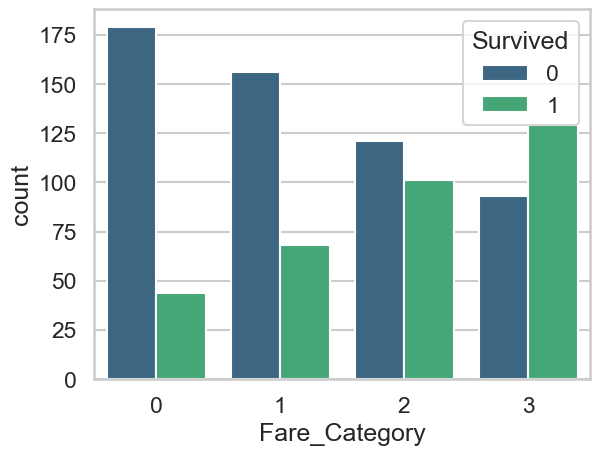

In [148]:
dataset["Fare_Category"] = pd.qcut(dataset["Fare"], q=4, labels=False)

sns.countplot(
    dataset,
    x="Fare_Category", 
    hue="Survived",
    palette="viridis"
)

Ваші висновки:

Кількість виживших між різними квартилями доволі сильно відрізняється тому я вважаю що використовувати кодування є доцільним і може пригодитись в майбутньому аналізі.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [149]:
dataset["Family_size"] = dataset["Parch"] + dataset["SibSp"]

dataset["Alone"] = 0
dataset.loc[dataset["Family_size"] == 0, "Alone"] = 1

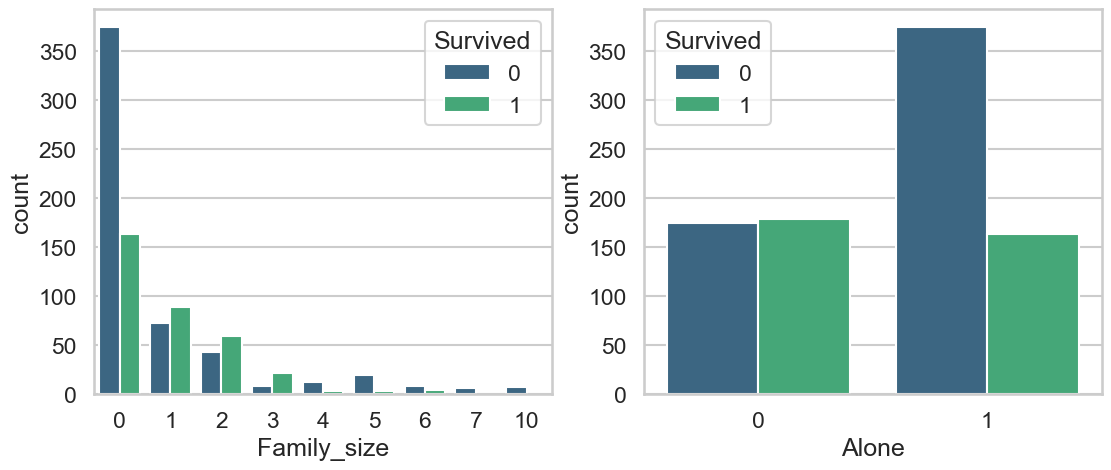

In [150]:
fix, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(
    dataset,
    x="Family_size", 
    hue="Survived",
    palette="viridis",
    ax=ax[0]
)

sns.countplot(
    dataset,
    x="Alone", 
    hue="Survived",
    palette="viridis",
    ax=ax[1]
)
fig.tight_layout()

Ваші висновки:

З цих 2 діаграм ми можемо зрозуміти що пасажири які не були самотні мали ймовірність вижити більше але водночас сімї з меншою кількістю людей мали більше шансів вижити відносно великих сімей. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [151]:
dataset.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Fare_Category,Family_size,Alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,0,1,0


In [152]:
dataset = dataset.drop(columns=["Ticket", "Cabin"])

Ваші висновки:

На мою думку для подальшого аналізу нам не пригодяться наступні колонки:
- ```PassengerId``` вказаний як порядковий номер рядка при загрузці датасету він ніяк не впливає на те чи виживе пасажир
- ```Ticket``` тому що це унікальний номер квитка який складається з рандомних даних які також не впливають на виживання пасажира
- ```Cabin``` тому що в цій колонці є дуже багато пропущених значень що унеможливлює його заповнення коректними даними

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [153]:
dataset["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in dataset["Name"]]

dataset["Title"] = dataset["Title"].replace(
    ["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],
    "other"
)
dataset["Title"] = dataset["Title"].replace(["Ms", "Mlle", "Mrs", "Mme"], "Miss")


In [154]:
def convert_to_numbers(df: DataFrame, column: str) -> DataFrame:
    replaced_dict: dict[str, int] = dict()

    for v, i in zip(df[column].unique(), range(len(df[column].unique()))):
        if str(v) != "nan":
            replaced_dict[v] = i

    print(replaced_dict)
    df[column] = df[column].map(replaced_dict)

In [155]:
convert_to_numbers(dataset, "Sex")
convert_to_numbers(dataset, "Embarked")
convert_to_numbers(dataset, "Title")


{'male': 0, 'female': 1}
{'S': 0, 'C': 1, 'Q': 2}
{'Mr': 0, 'Miss': 1, 'Master': 2, 'other': 3}


In [156]:
dataset.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
Age_Category     0
Fare_Category    0
Family_size      0
Alone            0
Title            0
dtype: int64

In [157]:
dataset = fill_missed(dataset, "Embarked")

dataset.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category,Fare_Category,Family_size,Alone,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,1,0,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,2,3,1,0,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,1,1,0,1,1


Ваші висновки:

З самого початку я формую колонку ```Title``` з ```Name``` за допомогою функцій форматування. Далі використовуючи функцію ```convert_to_numbers``` я перетворюю потрібні мені категоріальні змінні з строки в числа. Після конвертації я помітив що у колонці ```Embarked``` є пропущені значення та заповнив їх за допомогою раніше створеної функції ```fill_missed```. Після всіх цих операцій я отримав значення колонок переведені в числа та відсутність Null.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



In [158]:
dataset_categorical = dataset[
    ["Survived", "Pclass", "Sex", "Embarked", "Age_Category", "Fare_Category", "Alone", "Title"]
]

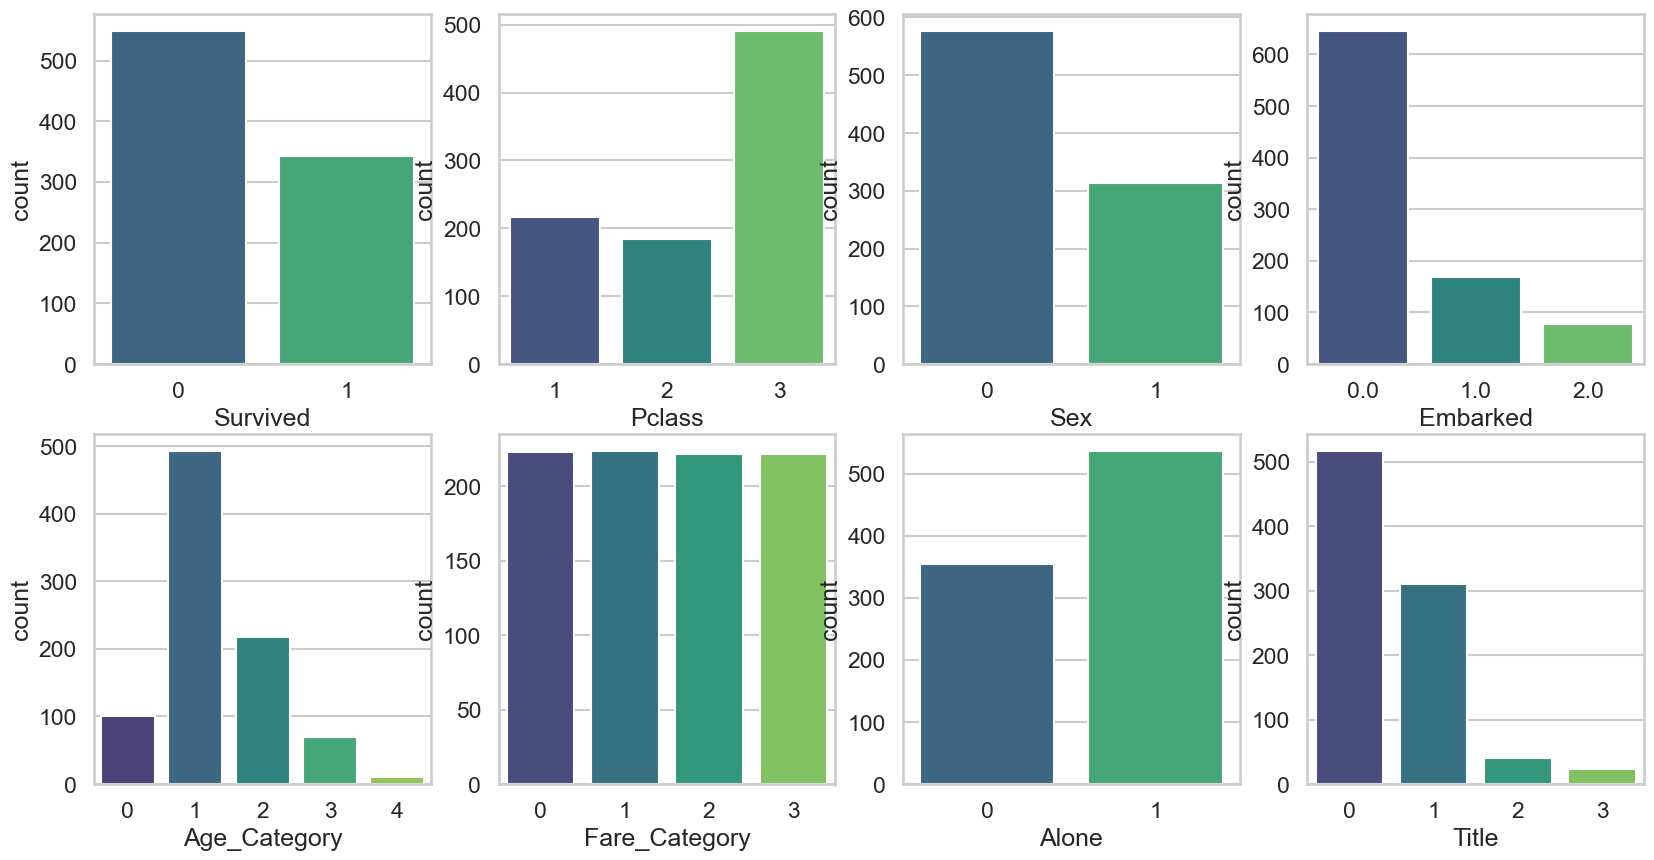

In [159]:
fix, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(dataset_categorical, ax.flatten()):
    sns.countplot(dataset_categorical, x=variable, ax=subplot, palette="viridis")

fig.tight_layout()

Ваші висновки:

- ```Survived``` Відображає кількість загиблих(0) та виживших(1) як ми можемо бачити кількість загиблих є набагато більше.
- ```Pclass``` Відображає кількість пасажирів в кожному з класів найбільша кількість в 3 класі.
- ```Sex``` Відображає кількість чоловіків(0) та жінок(1) кількість чоловіків майже в 2 рази більше.
- ```Embarked``` Відображає з якого саме порту ```{'S': 0, 'C': 1, 'Q': 2}``` пасажир потрапив на борт найбільше пасажирів були з порту Southampton
- ```Age_Category``` Відображає вікову категорію пасажира найбільше пасажирів у віковій категорії 1 (від 16 до 32 років).
- ```Fare_Category``` Відображає ціну за квиток поділену на рівні квартилі.
- ```Alone``` Відображає кількість самотніх пасажирів та пасажирів з сімєю більшість пасажирів згідно діаграми були самотні.
- ```Title``` Відображає кількість кожного унікального звання людини ```{'Mr': 0, 'Miss': 1, 'Master': 2, 'other': 3}``` що може впливати на шанси виживання цього пасажира.


***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [160]:
dataset_numerical = dataset[
    ["Age", "SibSp", "Parch", "Fare", "Family_size"]
]

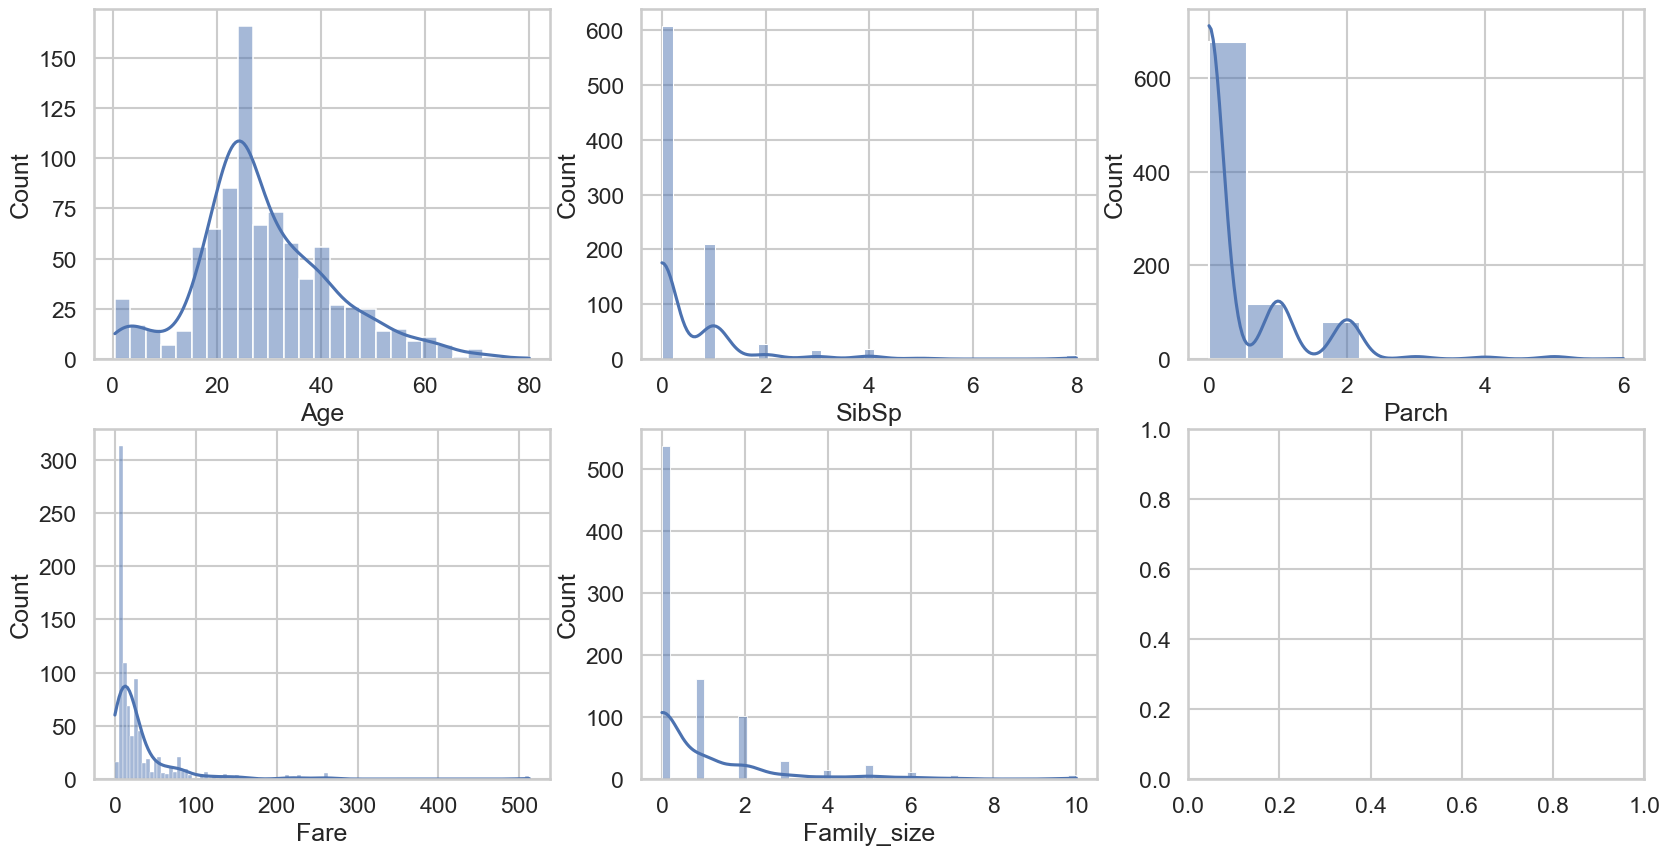

In [161]:
fix, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(dataset_numerical, ax.flatten()):
    sns.histplot(dataset_numerical, x=variable, kde=True, ax=subplot, palette="viridis")

fig.tight_layout()

Ваші висновки:

- ```Age``` Розподіл віку пасажирів трохи нагадує нормальний розподіл але не є ним. Також можна сказати що середній вік пасажирів був приблизно від 20 до 30 років.
- ```SibSp``` та ```Parch``` Ці 2 розподіли нам показують що більша частина пасажирів були на кораблі без дітей або батьків.
- ```Fare``` Розподіл вартості квитків показує що більшість квитків є дешевими але також є невелика кількість дорогих квитків яка формує довгий хвіст.
- ```Family_size``` Розподіл кількості членів сімї показує що більшість людей або подорожували самі або з 1-2 родичами.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

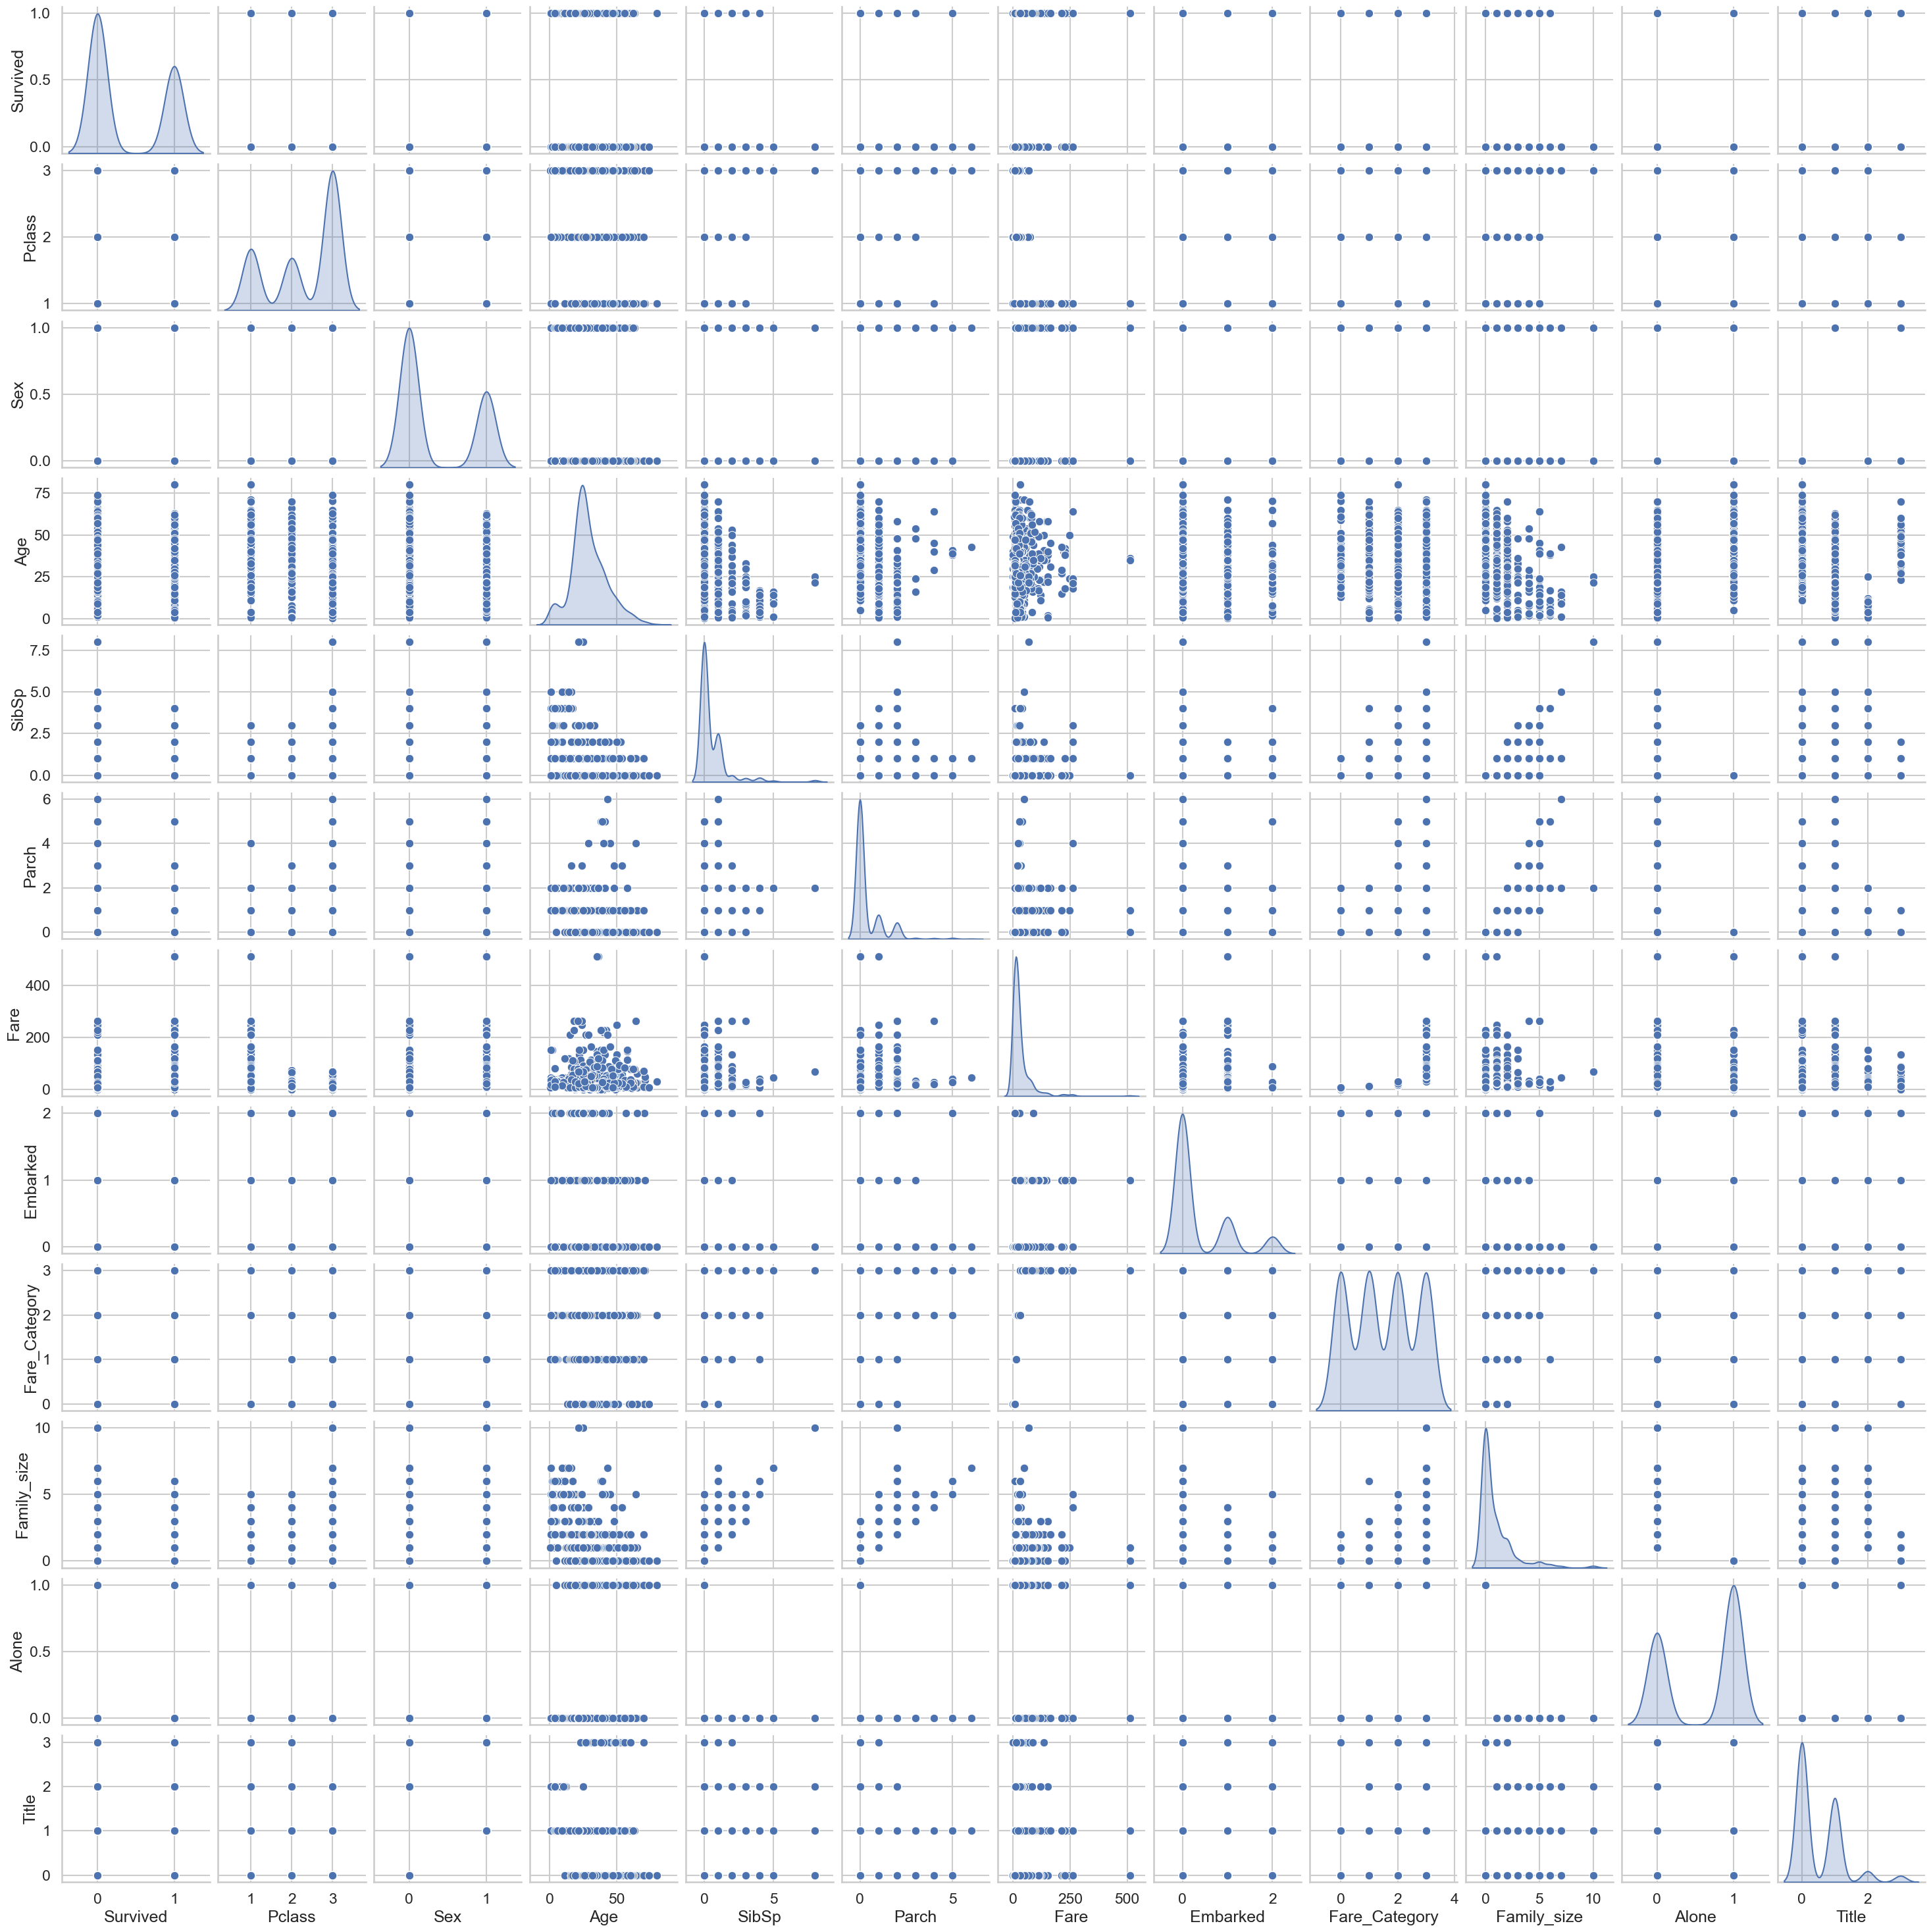

In [162]:
sns.pairplot(dataset, diag_kind='kde')

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.